# Import Modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [6]:
use_case_1_df = pd.read_excel("../data/raw/PSP_Jan_Feb_2019.xlsx", index_col=0)
# print(use_case_1_df.head().to_latex())
use_case_1_df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [7]:
df = use_case_1_df
df.shape

(50410, 7)

# First Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.1+ MB


In [9]:
use_case_1_df.describe()

,tmsp,amount,success,3D_secured
count,50410,50410.000000,50410.000000,50410.000000
mean,2019-01-29 16:28:52.923269120,202.395715,0.202896,0.238266
min,2019-01-01 00:01:11,6.000000,0.000000,0.000000
25%,2019-01-14 12:00:36.249999872,133.000000,0.000000,0.000000
50%,2019-01-30 15:20:07.500000,201.000000,0.000000,0.000000
75%,2019-02-13 01:09:50.500000,269.000000,0.000000,0.000000
max,2019-02-28 23:48:19,630.000000,1.000000,1.000000
std,NaN,96.274730,0.402160,0.426027


In [10]:
use_case_1_df.columns.to_list()

['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card']

In [11]:
df.isnull().sum()

tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [12]:
df.nunique()

tmsp          50121
country           3
amount          517
success           2
PSP               4
3D_secured        2
card              3
dtype: int64

# Analyse columns

## Analyse tmsp

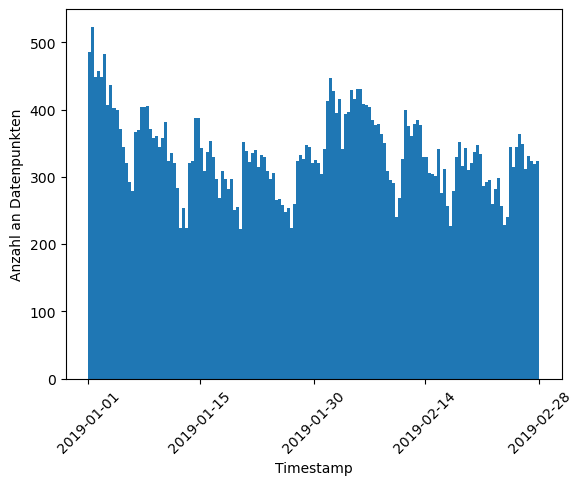

In [13]:
bin_nr = 150
fig, ax = plt.subplots(1, 1)
# create histogram, get bin position for label
_counts, bins, _patches = ax.hist(df["tmsp"], bins=bin_nr)
# set xticks at bin edges
plt.xticks(
    [
        bins[0],
        bins[int(bin_nr / 4)],
        bins[int(bin_nr / 2)],
        bins[int((bin_nr / 4) * 3)],
        bins[-1],
    ],
    rotation=45,
)
plt.ylabel("Anzahl an Datenpunkten")
plt.xlabel("Timestamp")
plt.savefig(
    "../Visualisierungen/Zeitliche-Verteilung-der-Datenpunkte.png", bbox_inches="tight"
)
plt.show()

In [14]:
df["Day of Week"] = df["tmsp"].dt.day_name()

In [15]:
sorted_day_of_weeks = df["Day of Week"].value_counts()[
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
]
sorted_day_of_weeks

Day of Week
Monday       7304
Tuesday      8663
Wednesday    8195
Thursday     7796
Friday       6899
Saturday     6234
Sunday       5319
Name: count, dtype: int64

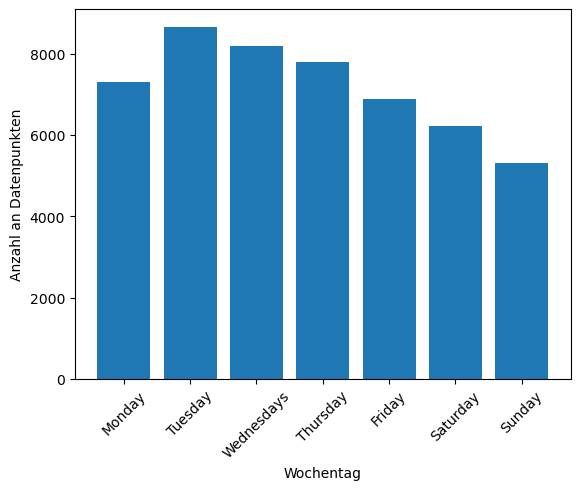

In [16]:
fig, ax = plt.subplots()
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesdays",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
ax.bar(days_of_week, sorted_day_of_weeks)
plt.xticks(rotation=45)
plt.ylabel("Anzahl an Datenpunkten")
plt.xlabel("Wochentag")
plt.savefig(
    "../Visualisierungen/Woechentliche-Verteilung-der-Datenpunkte.png",
    bbox_inches="tight",
)
plt.show()

## Analyse der Country

In [17]:
df["country"].unique()

array(['Germany', 'Austria', 'Switzerland'], dtype=object)

In [18]:
countries = df["country"].value_counts()
psp = df["PSP"].value_counts()
secured = df["3D_secured"].value_counts()
card = df["card"].value_counts()
success = df["success"].value_counts()

In [19]:
success

success
0    40182
1    10228
Name: count, dtype: int64

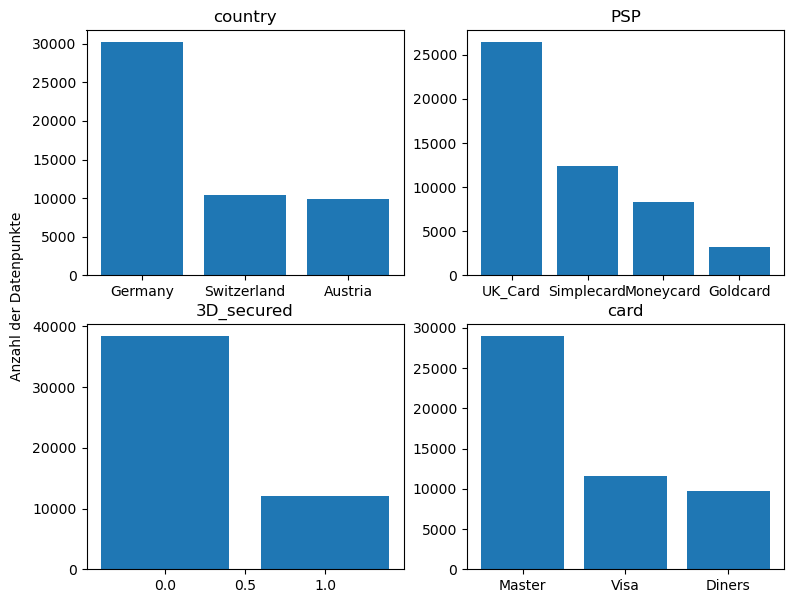

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 7), sharey=False)
fig.align_ylabels()
ax[0, 0].bar(countries.index, countries)
ax[0, 0].set_title("country")
ax[0, 1].bar(psp.index, psp)
ax[0, 1].set_title("PSP")
ax[1, 0].bar(secured.index, secured)
ax[1, 0].set_title("3D_secured")
ax[1, 1].bar(card.index, card)
ax[1, 1].set_title("card")
fig.text(0.04, 0.5, "Anzahl der Datenpunkte", va="center", rotation="vertical")

plt.savefig(
    "../Visualisierungen/Verteilung-restlicher-Datenpunkte.png", bbox_inches="tight"
)

plt.show()

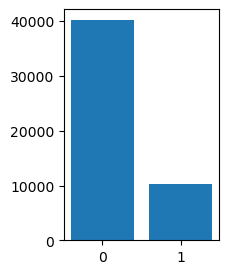

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 3), sharey=False)
fig.align_ylabels()
ax.bar(success.index, success)
# ax.set_title("success")
plt.xticks(success.index)
# ax[1].hist(df["amount"], bins=200)
plt.savefig("../Visualisierungen/Verteilung-Zielvariable.png", bbox_inches="tight")

plt.show()

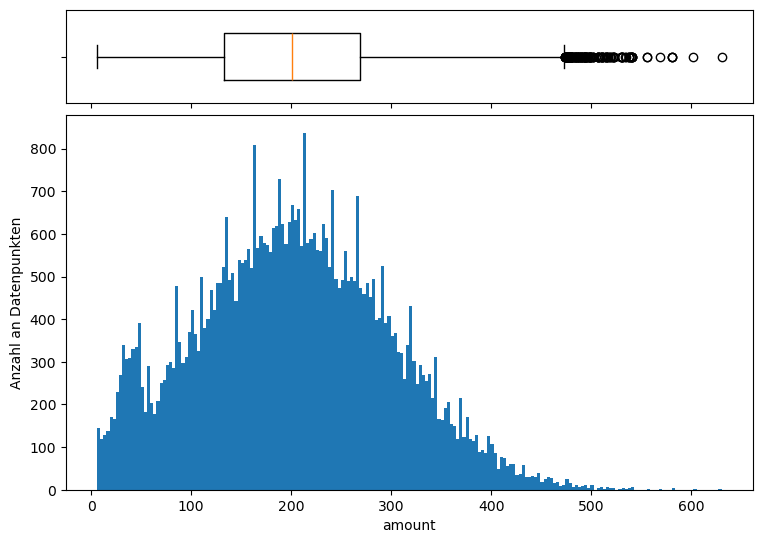

In [22]:
# Start with a square Figure.
fig = plt.figure(figsize=(11, 6))
gs = fig.add_gridspec(
    2,
    2,
    width_ratios=(4, 1),
    height_ratios=(1, 4),
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.05,
    hspace=0.05,
)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax.set_xlabel("amount")
ax.set_ylabel("Anzahl an Datenpunkten")
# no labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.tick_params(axis="y", labelleft=False)

ax.hist(df["amount"], bins=200, log=False)
ax_histx.boxplot(df["amount"], vert=False, widths=0.5)

plt.savefig("../Visualisierungen/Verteilung-Amount.png", bbox_inches="tight")
plt.show()

In [23]:
corr = df
corr.drop("tmsp", axis=1)
corr["country"] = corr["country"].astype("category").cat.codes
corr["PSP"] = corr["PSP"].astype("category").cat.codes
corr["card"] = corr["card"].astype("category").cat.codes
corr["Day of Week"] = corr["Day of Week"].astype("category").cat.codes
corr_matrix = corr.corr()
corr_matrix.style.background_gradient(cmap="coolwarm", axis=None)

,tmsp,country,amount,success,PSP,3D_secured,card,Day of Week
tmsp,1.000000,0.003038,0.010276,-0.001216,-0.016782,-0.017579,0.001058,-0.015979
country,0.003038,1.000000,-0.002327,0.000995,-0.005694,-0.007500,-0.001327,-0.000273
amount,0.010276,-0.002327,1.000000,-0.086423,0.002546,0.000178,0.001566,0.002582
success,-0.001216,0.000995,-0.086423,1.000000,-0.086926,0.059284,-0.009918,-0.011516
PSP,-0.016782,-0.005694,0.002546,-0.086926,1.000000,-0.004081,0.007622,-0.000474
3D_secured,-0.017579,-0.007500,0.000178,0.059284,-0.004081,1.000000,-0.013314,0.008253
card,0.001058,-0.001327,0.001566,-0.009918,0.007622,-0.013314,1.000000,-0.001535
Day of Week,-0.015979,-0.000273,0.002582,-0.011516,-0.000474,0.008253,-0.001535,1.000000


array([[<Axes: xlabel='country', ylabel='country'>,
        <Axes: xlabel='amount', ylabel='country'>,
        <Axes: xlabel='success', ylabel='country'>,
        <Axes: xlabel='PSP', ylabel='country'>,
        <Axes: xlabel='3D_secured', ylabel='country'>,
        <Axes: xlabel='card', ylabel='country'>,
        <Axes: xlabel='Day of Week', ylabel='country'>],
       [<Axes: xlabel='country', ylabel='amount'>,
        <Axes: xlabel='amount', ylabel='amount'>,
        <Axes: xlabel='success', ylabel='amount'>,
        <Axes: xlabel='PSP', ylabel='amount'>,
        <Axes: xlabel='3D_secured', ylabel='amount'>,
        <Axes: xlabel='card', ylabel='amount'>,
        <Axes: xlabel='Day of Week', ylabel='amount'>],
       [<Axes: xlabel='country', ylabel='success'>,
        <Axes: xlabel='amount', ylabel='success'>,
        <Axes: xlabel='success', ylabel='success'>,
        <Axes: xlabel='PSP', ylabel='success'>,
        <Axes: xlabel='3D_secured', ylabel='success'>,
        <Axes: xlabel

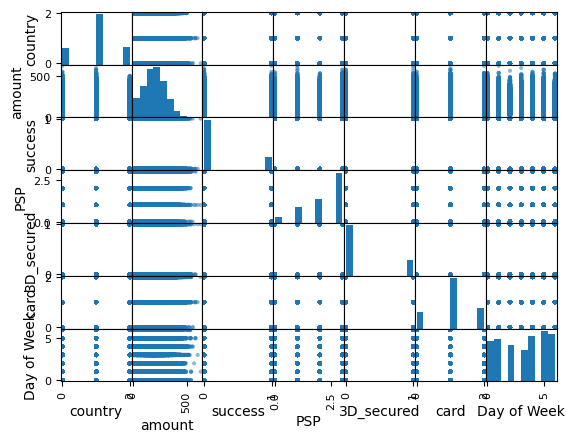

In [24]:
pd.plotting.scatter_matrix(corr)

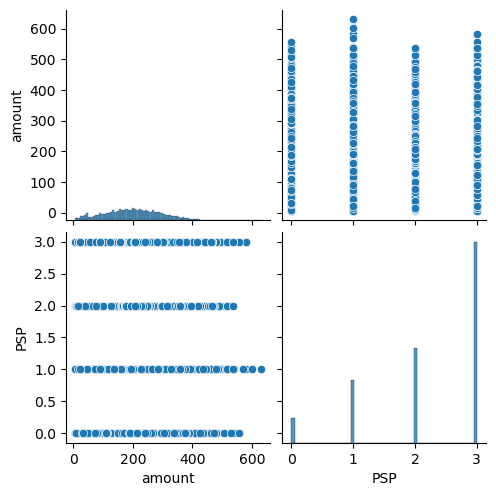

In [25]:
sns.pairplot(df, vars=["amount", "PSP"])